In [53]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
#jupyter内で画像を表示
%matplotlib inline 
#別ウィンドウで画像表示
# %matplotlib qt 
import csv
import json
from ipywidgets import interact, interactive, fixed, RadioButtons
import ipywidgets as widgets
from IPython.display import display
import pathlib
import re
import sys, math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 100)

In [68]:
send_sigo_path = pathlib.Path('../../ns3.30/data/send_sigo/sigo-seed_20000nodenum_500.csv')
send_lsgo_path = pathlib.Path('../../ns3.30/data/send_lsgo/lsgo-seed_20000nodenum_500.csv')
send_sigo_df = pd.read_csv(send_sigo_path)
send_lsgo_df = pd.read_csv(send_lsgo_path)

In [69]:
dest_list =send_lsgo_df['des_id'].value_counts().index.tolist()
send_lsgo_df

,source_id,source_x,source_y,time,hop,pri_1_id,pri_2_id,pri_3_id,pri_4_id,pri_5_id,pri_1_r,pri_2_r,pri_3_r,pri_4_r,pri_5_r,des_id
11,1,81,10299999,1,489,367,419,166,311,1.000000,1.000000,0.755343,0.862365,0.794794,97,1
166,-1,151,10300200,2,32,177,288,419,367,1.000000,1.000000,1.000000,1.000000,1.000000,97,0
311,-1,180,10300200,2,32,177,217,288,56,1.000000,0.969213,0.968280,1.000000,0.861494,97,0
367,1,212,10300200,2,192,32,56,64,217,0.887628,1.000000,0.969180,0.761403,1.000000,97,1
419,1,212,10300200,2,64,32,56,217,177,0.951754,0.967828,0.969180,1.000000,1.000000,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1001,719,19354813,12,101,57,54,396,146,1.000000,1.000000,1.000000,0.926025,1.000000,101,0
146,1001,768,19354813,12,101,57,54,396,10000000,0.946685,1.000000,1.000000,1.000000,0.000000,101,0
54,1000,794,19359013,13,101,57,10000000,10000000,10000000,1.000000,1.000000,0.000000,0.000000,0.000000,101,0
57,992,798,19359013,13,101,10000000,10000000,10000000,10000000,1.000000,0.000000,0.000000,0.000000,0.000000,101,0


In [49]:
def vis_topology(time, source_id, next_id_list):
    row_no = 0
    fileobj = open("../../ns3.30/data/no_signal_300_animFile", "r", encoding="utf_8")
    img_area = np.zeros(shape=(1050,1050, 3), dtype=np.int16)
    plt.figure(figsize=(10, 10))
    while True:
        line = fileobj.readline()
        if('<nu p="p"' in line):
            line_split = line.split()
            if('.' in line_split[2]):
                continue
            line_time = re.sub(r"\D", "", line_split[2])
            node_id = re.sub(r"\D", "", line_split[3])
            pos_x = re.findall(r"\d+", line_split[4])
            pos_x = pos_x[0]
            pos_y = re.findall(r"\d+", line_split[5])
            pos_y = pos_y[0]
            if(line_time == time):
                if(node_id == source_id or node_id in next_id_list):
                    print(line_split)
                    cv2.circle(img=img_area, center=(int(pos_x),
                           int(pos_y)), radius=10, 
                               color=(255,241,0), thickness=-1)
        
        if('t="21"' in line):
            break
    plt.grid(color='w', linestyle='dotted', linewidth=1.0)
    plt.xticks([1000,800,600,400,200, 0]) 
    plt.xlim([0, 1000])
    plt.yticks([1000,800,600,400,200, 0])
    plt.ylim([0, 1000])
    plt.imshow(img_area)

['<nu', 'p="p"', 't="14"', 'id="23"', 'x="201.6"', 'y="335.01"', '/>']
['<nu', 'p="p"', 't="14"', 'id="2"', 'x="-1.6"', 'y="664.94"', '/>']
['<nu', 'p="p"', 't="14"', 'id="23"', 'x="201.6"', 'y="335.01"', '/>']
['<nu', 'p="p"', 't="14"', 'id="24"', 'x="534.47"', 'y="398.4"', '/>']
['<nu', 'p="p"', 't="14"', 'id="25"', 'x="1001.6"', 'y="529.09"', '/>']


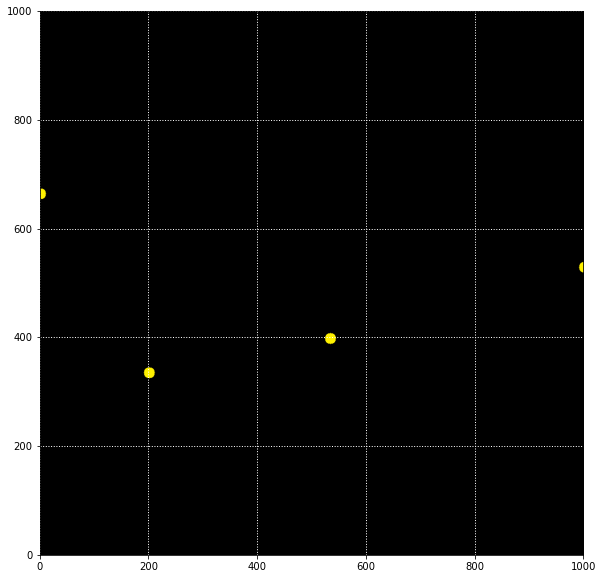

In [50]:
time = '14'
source_id = '2'
next_id_list = ['23','24', '25']
vis_topology(time, source_id, next_id_list)